<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
path_filename = '/home/mcc/Dropbox/01-Magni-mind/1-WHO-life-expectancy/groupby_test/Life_Expectancy_Data.csv'

# Clean column names
column_names = ['Country','Year','Status','LifeExpectancy','AdultMort',
                'InfD','EtOH','PercExpen','HepB','Measles',
                'BMI','lt5yD','Polio','TotalExpen','DTP','HIV',
                'GDP','Population','Thin1_19y','Thin5_9y','Income',
                'Education']

df = pd.read_csv(path_filename, 
                 names=column_names, 
                 header=0)

In [4]:
# Drop 10 rows with no Life Expectancy data.
# NOTE 10 rows deleted with delelte 10 countries
df.dropna(subset=['LifeExpectancy'], inplace=True) 

# These three vars have missing values greater than 15% per feature.
df.drop(['Population', 'HepB', 'GDP'], axis=1, inplace=True)

# Since these seem missing missing at random, simply impute the values with the column mean.
df['AdultMort'].fillna(np.mean(df.AdultMort), inplace=True)
df['InfD'].fillna(np.mean(df.InfD), inplace=True)
df['EtOH'].fillna(np.mean(df.EtOH), inplace=True)
df['PercExpen'].fillna(np.mean(df.PercExpen), inplace=True)
df['Measles'].fillna(np.mean(df.Measles), inplace=True)
df['BMI'].fillna(np.mean(df.BMI), inplace=True)
df['Polio'].fillna(np.mean(df.Polio), inplace=True)
df['TotalExpen'].fillna(np.mean(df.TotalExpen), inplace=True)
df['DTP'].fillna(np.mean(df.DTP), inplace=True)
df['Thin1_19y'].fillna(np.mean(df.Thin1_19y), inplace=True)
df['Thin5_9y'].fillna(np.mean(df.Thin5_9y), inplace=True)
df['Income'].fillna(np.mean(df.Income), inplace=True)
df['Education'].fillna(np.mean(df.Education), inplace=True)

# Convert Dev status to a binary variable, where Developing Nations = 0, Developed Nation status = 1.
df['Status'] = df['Status'].apply(lambda x: 0 if x == 'Developing' else 1).astype('int8')

In [5]:
print('\nShape of Cleaned and Imputed dataframe:', df.shape)
      
df.isnull().sum()


Shape of Cleaned and Imputed dataframe: (2928, 19)


Country           0
Year              0
Status            0
LifeExpectancy    0
AdultMort         0
InfD              0
EtOH              0
PercExpen         0
Measles           0
BMI               0
lt5yD             0
Polio             0
TotalExpen        0
DTP               0
HIV               0
Thin1_19y         0
Thin5_9y          0
Income            0
Education         0
dtype: int64

In [6]:
# group the data by country
grouped = df.groupby("Country")
grouped

In [7]:
col_width = df["Country"].str.len().max()

col_width

52

In [9]:
print('\nThe growth rate for each country is calculated and listed below.\n')
print('Country, Rate, Rate-Slope, Mean BMI\n')
print('-'*70)

col_width = df["Country"].str.len().max()

for name, group in grouped:
    # get the year and bmi values for this country
    Year = group["Year"].values.reshape(-1, 1)
    BMI = group["BMI"].values.reshape(-1, 1)
    MeanBMI = np.mean(group["BMI"])
    
    # fit a linear regression model
    model = LinearRegression().fit(Year, BMI)
    
    # get the slope of the fitted line
    slope = model.coef_[0][0]

    #check if the slope is positive (increasing) or negative (decreasing){num:.3}
    print(f"{name}{' '*(col_width-len(name))} is {'Increasing' if slope > 0 else 'Decreasing'}, {slope:.3}, \t{MeanBMI:.3}")


The growth rate for each country is calculated and listed below.

Country, Rate, Rate-Slope, Mean BMI

----------------------------------------------------------------------
Afghanistan                                          is Increasing, 0.466, 	15.5
Albania                                              is Increasing, 1.07, 	49.1
Algeria                                              is Increasing, 1.07, 	48.7
Angola                                               is Increasing, 0.397, 	18.0
Antigua and Barbuda                                  is Increasing, 1.47, 	38.4
Argentina                                            is Increasing, 0.0307, 	55.0
Armenia                                              is Increasing, 0.245, 	44.7
Australia                                            is Increasing, 1.81, 	55.9
Austria                                              is Increasing, 2.35, 	48.3
Azerbaijan                                           is Decreasing, -0.0449, 	43.8
Bahamas          

In [15]:
# Save country stats
columns = ['Country','RateOfChangeBMI','MeanBMI']
df = pd.DataFrame(columns=columns)

# loop through each group (i.e. country)
for name, group in grouped:
    # get the year and life expectancy values for this country
    Year = group["Year"].values.reshape(-1, 1)
    BMI = group["BMI"].values.reshape(-1, 1)
    MeanBMI = np.mean(group["BMI"])
    
    # fit a linear regression model
    model = LinearRegression().fit(Year, BMI)
    
    # get the slope of the fitted line
    slope = model.coef_[0][0]
    
    # append country info
    df.loc[len(df.index)] = [name, slope, MeanBMI] 
    
    
df.head()

,Country,RateOfChangeBMI,MeanBMI
0,Afghanistan,0.465735,15.51875
1,Albania,1.068676,49.06875
2,Algeria,1.074265,48.74375
3,Angola,0.396618,18.01875
4,Antigua and Barbuda,1.472353,38.42500


In [16]:
df_sorted = df.sort_values(by=['RateOfChangeBMI'])
df_sorted.head(10)

,Country,RateOfChangeBMI,MeanBMI
96,Luxembourg,-2.140882,47.82500
87,Kuwait,-1.749559,59.60625
90,Latvia,-1.519853,51.30625
170,Ukraine,-1.476618,50.89375
73,Iceland,-1.468235,51.07500
119,Norway,-1.388824,50.81250
95,Lithuania,-1.311029,49.23125
108,Montenegro,-0.926471,50.48750
62,Germany,-0.790441,51.99375
133,Russian Federation,-0.753676,53.31875


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RateOfChangeBMI,183.0,0.448164,0.746526,-2.140882,0.019706,0.465735,0.922574,2.852941
MeanBMI,183.0,38.235394,15.823028,11.187500,20.887500,42.681250,51.987500,69.431250


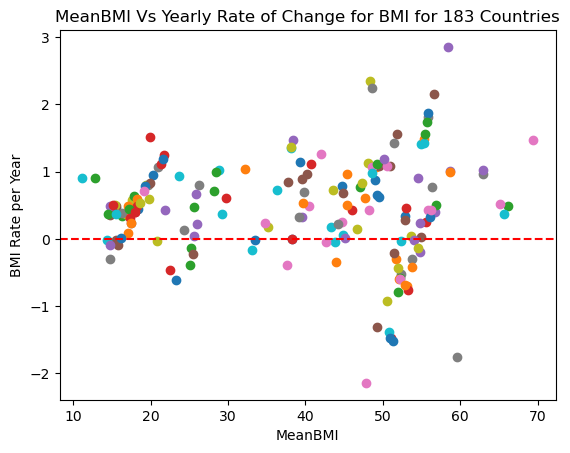

In [18]:
# loop through each group (i.e. country)
for name, group in grouped:
    # get the year and life expectancy values for this country
    Year = group["Year"].values.reshape(-1, 1)
    BMI = group["BMI"].values.reshape(-1, 1)
    MeanBMI = np.mean(group["BMI"])
    
    # fit a linear regression model
    model = LinearRegression().fit(Year, BMI)
    
    # get the slope of the fitted line
    slope = model.coef_[0][0]

    # check if the slope is positive (increasing) or negative (decreasing)
    #if slope > 0:
    #    print(f"{name} is Increasing, coeff={model.coef_}, Age={MeanAge}")
    #else:
    #    print(f"{name} is Decreasing, coeff={model.coef_}, Age={MeanAge}")
           
    # plot the life expectancy over time for this country
    plt.scatter(MeanBMI, slope, label=name)
    
# add a legend and show the plot
plt.axhline(y=0, color='red', linestyle='--')
plt.legend().remove()
plt.title("MeanBMI Vs Yearly Rate of Change for BMI for 183 Countries")
plt.xlabel('MeanBMI')
plt.ylabel('BMI Rate per Year')
plt.show()    